# 1. Anomaly Detection

In [25]:
import pandas as pd
import numpy as np

data = pd.read_csv('data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [26]:
x = data.drop('y', axis=1)
x1 = x.loc[:, 'x1']
x2 = x.loc[:, 'x2']
y = data.loc[:, 'y']

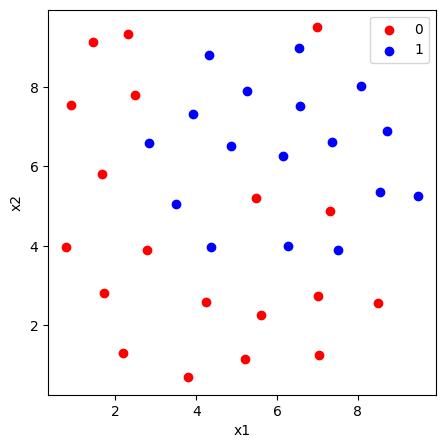

In [27]:
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(5, 5))
plt.scatter(x1[y == 0], x2[y == 0], color='red', label='0')
plt.scatter(x1[y == 1], x2[y == 1], color='blue', label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [28]:
from sklearn.covariance import EllipticEnvelope

ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(x[y==0])
y_bad_pred = ad_model.predict(x[y==0])
print(y_bad_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


In [29]:
ad_model2 = EllipticEnvelope(contamination=0.02)
ad_model2.fit(x[y==1])
y_good_pred = ad_model2.predict(x[y==1])
print(y_good_pred)

[ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


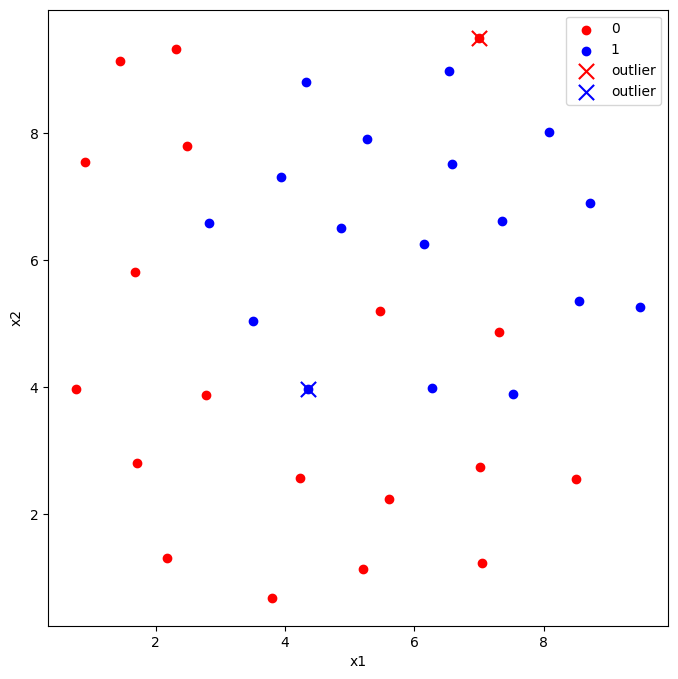

In [30]:
fig2 = plt.figure(figsize=(8, 8))
plt.scatter(x1[y == 0], x2[y == 0], color='red', label='0')
plt.scatter(x1[y == 1], x2[y == 1], color='blue', label='1')
plt.scatter(x1[y == 0][y_bad_pred == -1], x2[y == 0][y_bad_pred == -1], color='red', s=120, marker='x', label='outlier')
plt.scatter(x1[y == 1][y_good_pred == -1], x2[ y == 1][y_good_pred == -1], color='blue', s=120, marker='x', label='outlier')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


# 2. PCA

In [31]:
data = pd.read_csv('data_class_processed.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [32]:
x = data.drop('y', axis=1).values.reshape(-1, 2)
y = data.loc[:, 'y']

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x_norm = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.5369408 0.4630592]


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)
print(x_train.shape, x_test.shape, x.shape)

(21, 2) (14, 2) (35, 2)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(x_train, y_train)

y_train_pred = knn10.predict(x_train)
y_test_pred = knn10.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(accuracy_train, accuracy_test)

0.9047619047619048 0.6428571428571429


In [37]:
xx, yy = np.meshgrid(np.arange(0, 10, 0.05), np.arange(0, 10, 0.05))
x_range = np.c_[xx.ravel(), yy.ravel()]
print(x_range.shape)

(40000, 2)


In [39]:
y_range_pred = knn10.predict(x_range)

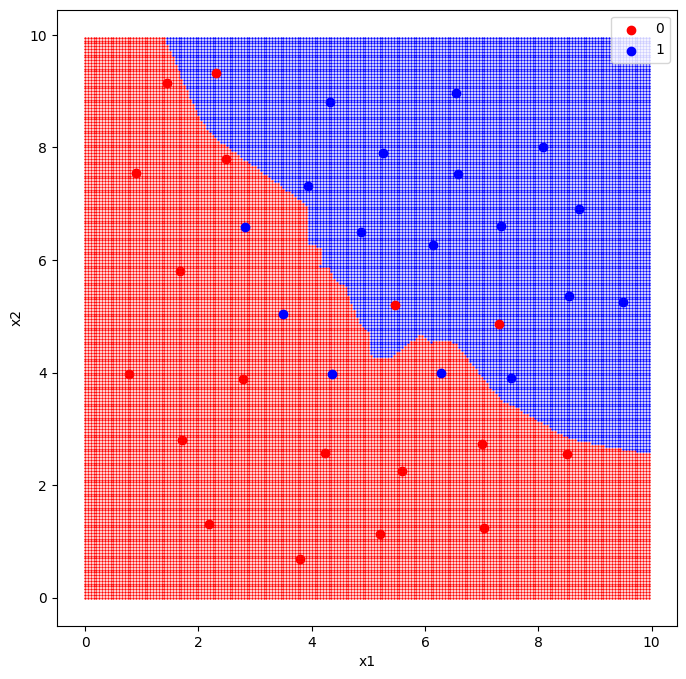

In [41]:
fig3 = plt.figure(figsize=(8, 8))
plt.scatter(x_range[y_range_pred == 0][:, 0], x_range[y_range_pred == 0][:, 1], color='red', s=0.5)
plt.scatter(x_range[y_range_pred == 1][:, 0], x_range[y_range_pred == 1][:, 1], color='blue', s=0.5)
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='red', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='blue', label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
print(TN, FP, FN, TP)

4 2 3 5


In [45]:
accuracy = (TP + TN) / (TN + FP + FN + TP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
print(accuracy, precision, recall, f1)

0.6428571428571429 0.7142857142857143 0.625 0.6666666666666666
